# **Experiment C1**: full algorithm of concent from smudged ground truth

Vary noise level and number of images

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

[Errno 2] No such file or directory: '/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM'
/Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/projects/lifting_v2/experiments/experimentA1


In [ ]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

     |████████████████████████████████| 186 kB 11.5 MB/s 
     |████████████████████████████████| 2.2 MB 47.6 MB/s 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/r

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC2.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC2.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


In [6]:
# Experiment parameters
vol_smudge = 5
img_size = 65  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 1 # number of times mesh refinement
snr = 1 / 2  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 8192  # 5000  # [512, 1024, 2048, 4096, 8192]
lambda0 = 1/3000 * img_size**2
# rots_batch_size = 10000

max_iter = 2

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC2" , postfix="SNR{}_L{}_N{}_r{}_lam{}_i{}".format(int(1/snr),img_size,num_imgs,mr_repeat, int(lambda0), max_iter))
exp.dbglevel(4)

2022-01-27 16:04:22,665 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC2_22-01-27_16-04-22_SNR2_L65_N8192_r1_lam1_i2


In [7]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/expA2_21-10-10_12-30-19_L65_N512_r1_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_12-34-53_L65_N512_r2_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_13-08-24_L65_N512_r1_k90_lamV10_lamD-10"
# results_folder = "results/expA2_21-10-10_13-47-27_L65_N512_r2_k90_lamV10_lamD-10"  # "results/lifting_21-04-26_12-22-06"

In [8]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
               rots_reg_param=lambda0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-01-27 16:04:23,277 INFO Start Experiment
2022-01-27 16:04:23,279 INFO Running Experiment for SNR = 0.5 and 8192 images
2022-01-27 16:04:23,280 INFO This experiment illustrates orientation refinement using a lifting approach
2022-01-27 16:04:23,282 INFO Initialize simulation object and CTF filters.
2022-01-27 16:04:23,283 INFO Load 3D map and downsample 3D map to desired grids of 65 x 65 x 65.
2022-01-27 16:04:23,307 INFO Use downsampled map to creat simulation object.
2022-01-27 16:04:23,358 INFO Get true rotation angles generated randomly by the simulation object.
2022-01-27 16:05:05,962 INFO Applying forward transformations in pipeline
2022-01-27 16:05:05,963 INFO All forward transformations applied
2022-01-27 16:05:05,964 INFO Loaded 8192 images
sigma = 1.8029358934624122e-06
tau = 0.0013006636481047568
2022-01-27 16:05:46,562 INFO Applying forward transformations in pipeline
2022-01-27 16:05:46,564 INFO All forward transformations applied
2022-01-27 16:05:46,564 INFO Loaded 81

sigmas = [1.17508019e-06 1.41971258e-06 1.35120975e-06 ... 1.48343396e-06
 1.70834376e-06 1.53034934e-06]
========================= Iteration 2 =========================
2022-01-27 16:23:59,947 INFO Do rots update step
betas = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2022-01-27 16:24:20,953 INFO Do vol update step
2022-01-27 16:24:21,360 INFO Compute adjoint forward mapping on the images
2022-01-27 16:24:21,361 INFO Running through projections 0/14761 = 0.0%
2022-01-27 16:27:22,292 INFO Running through projections 8192/14761 = 55.5%
2022-01-27 16:29:45,419 INFO Determined adjoint mappings. Shape = (65, 65, 65)
2022-01-27 16:29:45,598 INFO Running through projections 0/14761 = 0.0%
2022-01-27 16:30:01,007 INFO Running through projections 8192/14761 = 55.5%
2022-01-27 16:30:12,645 INFO Computing non-centered Fourier Transform
2022-01-27 16:30:12,894 INFO Update data_discrepa

2022-01-27 16:44:24,895 INFO Start Postprocessing
2022-01-27 16:44:24,899 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.9999999999997726
integrated (averaged) density = 1.0000000000002274


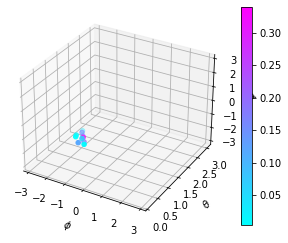

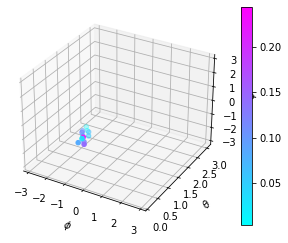

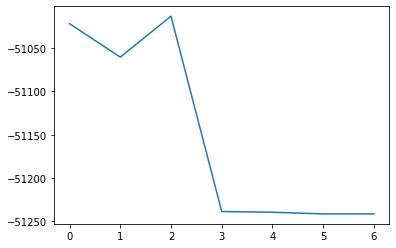

costs = [-51021.731139456926, -51060.375272700556, -51013.13699203488, -51238.83569302276, -51239.644636430006, -51241.58700893667, -51241.58775839771]
2022-01-27 16:44:30,534 INFO MSE deviation of the estimated initial rotations using register_rotations : 0.031040656334670673
2022-01-27 16:44:30,677 INFO MSE deviation of the estimated GD-refined rotations using register_rotations : 0.024044244506481675


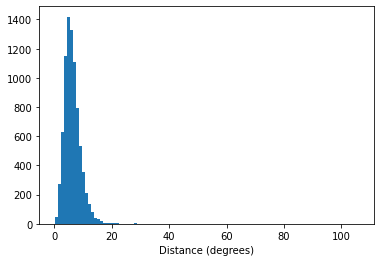

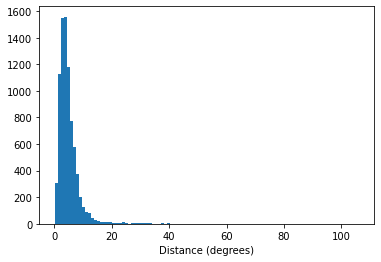

In [9]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               # num_imgs=num_imgs,
               # snr=snr,
              #  results_folder=results_folder #?
               )
